In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
dataset=pd.read_csv('CO2_emission.csv')
dataset

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5


# Getting basic info about dataframe:

In [3]:
dataset.shape

(935, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [5]:
dataset.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


# Cleaning the dataset:

In [6]:
dataset.isna().sum()

Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64

In [7]:
dataset[dataset.duplicated()]

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level


In [8]:
dataset.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

# Univariate Analysis

#Quan, Qual

In [9]:
qual=[]
quan=[]

for columnName in dataset.columns:
    if dataset[columnName].dtype=='object':
        qual.append(columnName)
    else:
        quan.append(columnName)

In [10]:
qual

['Make', 'Model', 'Vehicle_Class', 'Transmission']

In [11]:
quan

['Model_Year',
 'Engine_Size',
 'Cylinders',
 'Fuel_Consumption_in_City(L/100 km)',
 'Fuel_Consumption_in_City_Hwy(L/100 km)',
 'Fuel_Consumption_comb(L/100km)',
 'CO2_Emissions',
 'Smog_Level']

#Univariate Concepts

In [12]:
Univariate=pd.DataFrame(columns=quan,
                        index=['Mean','Median','Mode','Min','Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR','Lesser_IQR','Greater_IQR','Skewness',
                              'Kurtosis','Variance','Std_deviation'])
    
for columnName in quan:
    Univariate.loc['Mean', columnName]=dataset[columnName].mean()
    Univariate.loc['Median',columnName]=dataset[columnName].median()
    Univariate.loc['Mode',columnName]=dataset[columnName].mode()[0]
    Univariate.loc['Min',columnName]=dataset[columnName].min()
    Univariate.loc['Q1:25%',columnName]=np.percentile(dataset[columnName],25)
    Univariate.loc['Q2:50%',columnName]=np.percentile(dataset[columnName],50)
    Univariate.loc['Q3:75%',columnName]=np.percentile(dataset[columnName],75)
    Univariate.loc['99%',columnName]=np.percentile(dataset[columnName],99)
    Univariate.loc['Q4:100%',columnName]=dataset[columnName].max()
    Univariate.loc['IQR',columnName]=Univariate.loc['Q3:75%',columnName]-Univariate.loc['Q1:25%',columnName]
    Univariate.loc['Lesser_IQR',columnName]=Univariate.loc['Q1:25%',columnName]-1.5*Univariate.loc['IQR',columnName]
    Univariate.loc['Greater_IQR',columnName]=Univariate.loc['Q3:75%',columnName]+1.5*Univariate.loc['IQR',columnName]
    Univariate.loc['Skewness', columnName]=dataset[columnName].skew()
    Univariate.loc['Kurtosis', columnName]=dataset[columnName].kurtosis()
    Univariate.loc['Variance', columnName]=dataset[columnName].var()
    Univariate.loc['Std_deviation', columnName]=dataset[columnName].std()

In [13]:
Univariate

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
Mean,2021.0,3.214866,5.716578,12.49861,9.306203,11.060214,258.529412,4.726203
Median,2021.0,3.0,6.0,12.0,9.0,10.7,255.0,5.0
Mode,2021,2.0,4,10.1,8.7,9.1,214,5
Min,2021,1.0,3,4.0,3.9,4.0,94,1
Q1:25%,2021.0,2.0,4.0,10.1,7.7,9.1,213.0,3.0
Q2:50%,2021.0,3.0,6.0,12.0,9.0,10.7,255.0,5.0
Q3:75%,2021.0,4.0,8.0,14.8,10.8,13.1,303.5,6.0
99%,2021.0,6.6,12.0,21.864,15.9,19.432,408.0,7.0
Q4:100%,2021,8.0,16,30.3,20.9,26.1,608,7
IQR,0.0,2.0,4.0,4.7,3.1,4.0,90.5,3.0


In [14]:
lesser_range=[]
greater_range=[]

for columnName in quan:
    if (Univariate[columnName]['Min'] < Univariate[columnName]['Lesser_IQR']):
        lesser_range.append(columnName)
    if (Univariate[columnName]['Q4:100%'] > Univariate[columnName]['Greater_IQR']):
        greater_range.append(columnName)

In [15]:
lesser_range

[]

In [16]:
greater_range

['Engine_Size',
 'Cylinders',
 'Fuel_Consumption_in_City(L/100 km)',
 'Fuel_Consumption_in_City_Hwy(L/100 km)',
 'Fuel_Consumption_comb(L/100km)',
 'CO2_Emissions']

In [17]:
for columnName in greater_range:
    dataset[columnName][dataset[columnName]>Univariate[columnName]['Greater_IQR']]=Univariate[columnName]['Greater_IQR']

C:\Users\DELL\AppData\Local\Temp\ipykernel_13948\2790118684.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset[columnName][dataset[columnName]>Univariate[columnName]['Greater_IQR']]=Univariate[columnName]['Greater_IQR']
C:\Users\DEL

In [18]:
Univariate=pd.DataFrame(columns=quan,
                        index=['Mean','Median','Mode','Min','Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR','Lesser_IQR','Greater_IQR','Skewness',
                              'Kurtosis','Variance','Std_deviation'])
    
for columnName in quan:
    Univariate.loc['Mean', columnName]=dataset[columnName].mean()
    Univariate.loc['Median',columnName]=dataset[columnName].median()
    Univariate.loc['Mode',columnName]=dataset[columnName].mode()[0]
    Univariate.loc['Min',columnName]=dataset[columnName].min()
    Univariate.loc['Q1:25%',columnName]=np.percentile(dataset[columnName],25)
    Univariate.loc['Q2:50%',columnName]=np.percentile(dataset[columnName],50)
    Univariate.loc['Q3:75%',columnName]=np.percentile(dataset[columnName],75)
    Univariate.loc['99%',columnName]=np.percentile(dataset[columnName],99)
    Univariate.loc['Q4:100%',columnName]=dataset[columnName].max()
    Univariate.loc['IQR',columnName]=Univariate.loc['Q3:75%',columnName]-Univariate.loc['Q1:25%',columnName]
    Univariate.loc['Lesser_IQR',columnName]=Univariate.loc['Q1:25%',columnName]-1.5*Univariate.loc['IQR',columnName]
    Univariate.loc['Greater_IQR',columnName]=Univariate.loc['Q3:75%',columnName]+1.5*Univariate.loc['IQR',columnName]
    Univariate.loc['Skewness', columnName]=dataset[columnName].skew()
    Univariate.loc['Kurtosis', columnName]=dataset[columnName].kurtosis()
    Univariate.loc['Variance', columnName]=dataset[columnName].var()
    Univariate.loc['Std_deviation', columnName]=dataset[columnName].std()

In [19]:
Univariate

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
Mean,2021.0,3.212727,5.712299,12.458289,9.290588,11.033048,257.898128,4.726203
Median,2021.0,3.0,6.0,12.0,9.0,10.7,255.0,5.0
Mode,2021,2.0,4,10.1,8.7,9.1,214.0,5
Min,2021,1.0,3,4.0,3.9,4.0,94.0,1
Q1:25%,2021.0,2.0,4.0,10.1,7.7,9.1,213.0,3.0
Q2:50%,2021.0,3.0,6.0,12.0,9.0,10.7,255.0,5.0
Q3:75%,2021.0,4.0,8.0,14.8,10.8,13.1,303.5,6.0
99%,2021.0,6.6,12.0,21.765,15.45,19.1,408.0,7.0
Q4:100%,2021,7.0,14,21.85,15.45,19.1,439.25,7
IQR,0.0,2.0,4.0,4.7,3.1,4.0,90.5,3.0


In [20]:
lesser_range=[]
greater_range=[]

for columnName in quan:
    if (Univariate[columnName]['Min'] < Univariate[columnName]['Lesser_IQR']):
        lesser_range.append(columnName)
    if (Univariate[columnName]['Q4:100%'] > Univariate[columnName]['Greater_IQR']):
        greater_range.append(columnName)

In [21]:
lesser_range

[]

In [22]:
greater_range

[]

In [23]:
dataset

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199.0,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256.0,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232.0,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242.0,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219.0,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230.0,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240.0,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236.0,5


#Frequency Table

In [24]:
dataset['CO2_Emissions'].value_counts()

CO2_Emissions
214.0    13
242.0    13
275.0    12
217.0    12
277.0    12
         ..
337.0     1
304.0     1
395.0     1
130.0     1
162.0     1
Name: count, Length: 232, dtype: int64

In [25]:
Freq_table=pd.DataFrame(columns=['Unique_values','Frequency','Rel_frequency','Cum_freq'])
Freq_table['Unique_values']=dataset['CO2_Emissions'].value_counts().index
Freq_table['Frequency']=dataset['CO2_Emissions'].value_counts().values
Freq_table['Rel_frequency']=Freq_table['Frequency']/232
Freq_table['Cum_freq']=Freq_table['Rel_frequency'].cumsum()

In [26]:
Freq_table

,Unique_values,Frequency,Rel_frequency,Cum_freq
0,214.0,13,0.056034,0.056034
1,242.0,13,0.056034,0.112069
2,275.0,12,0.051724,0.163793
3,217.0,12,0.051724,0.215517
4,277.0,12,0.051724,0.267241
...,...,...,...,...
227,337.0,1,0.004310,4.012931
228,304.0,1,0.004310,4.017241
229,395.0,1,0.004310,4.021552
230,130.0,1,0.004310,4.025862


#Distribution curves

C:\Users\DELL\AppData\Local\Temp\ipykernel_13948\3572961356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CO2_Emissions'],kde=True,kde_kws={'color':'Red'},color='Green')


<Axes: xlabel='CO2_Emissions', ylabel='Density'>

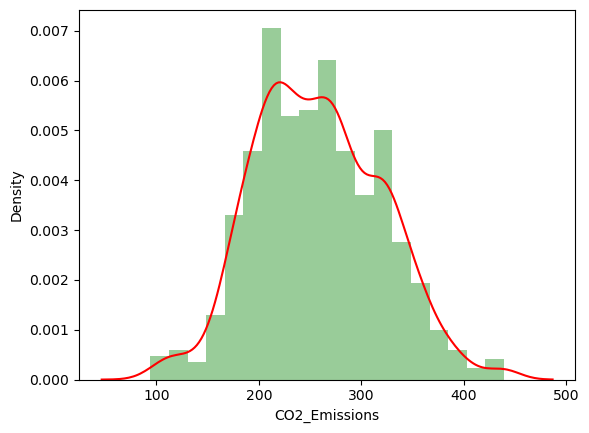

In [27]:
sns.distplot(dataset['CO2_Emissions'],kde=True,kde_kws={'color':'Red'},color='Green')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13948\1278104958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CO2_Emissions'],kde=True,kde_kws={'color':'Green'})


Mean:  257.89812834224597 Standard_deviation:  62.123066661066986
The area between 200 and 300 is  0.5748717114669113


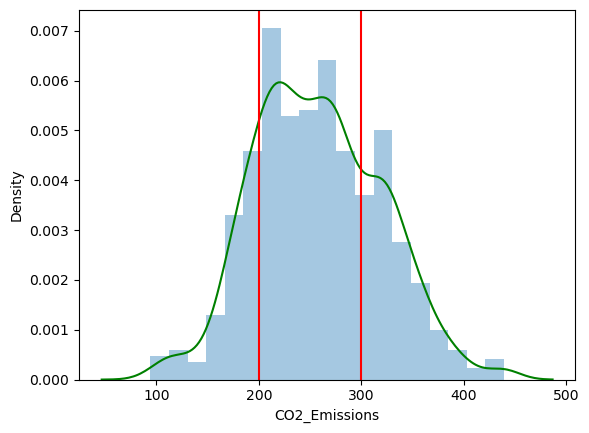

In [28]:
sns.distplot(dataset['CO2_Emissions'],kde=True,kde_kws={'color':'Green'})
pyplot.axvline(200,color='Red')
pyplot.axvline(300,color='Red')

mean=dataset['CO2_Emissions'].mean()
std_dev=dataset['CO2_Emissions'].std()
print('Mean: ',mean, 'Standard_deviation: ',std_dev)

dist=norm(mean,std_dev)
probabilities=[dist.pdf(i) for i in range(200,300)]
PDF=sum(probabilities)

print('The area between 200 and 300 is ',PDF)

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['CO2_Emissions'])
ecdf(350)

0.9294117647058824

Mean:  257.89812834224597 Standard_deviation:  62.123066661066986


C:\Users\DELL\AppData\Local\Temp\ipykernel_13948\1891274295.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True,kde_kws={'color':'Red'},color='Green')


<Axes: ylabel='Density'>

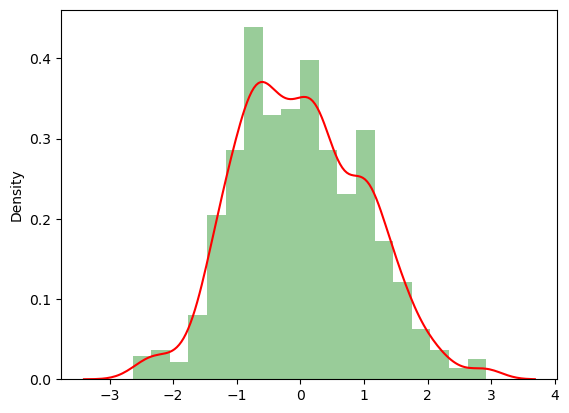

In [30]:
mean=dataset['CO2_Emissions'].mean()
std_dev=dataset['CO2_Emissions'].std()
print('Mean: ',mean, 'Standard_deviation: ',std_dev)

z_score=[((i-mean)/std_dev) for i in dataset['CO2_Emissions']]

sns.distplot(z_score,kde=True,kde_kws={'color':'Red'},color='Green')

# Bivariate Analysis

In [31]:
dataset[quan].cov()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
Model_Year,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Engine_Size,0.0,1.909613,2.483537,3.862935,2.241437,3.136185,71.025548,-1.191479
Cylinders,0.0,2.483537,3.830416,5.465182,3.136047,4.422901,100.683187,-1.787635
Fuel_Consumption_in_City(L/100 km),0.0,3.862935,5.465182,11.159259,6.700662,9.171305,200.067548,-3.272675
Fuel_Consumption_in_City_Hwy(L/100 km),0.0,2.241437,3.136047,6.700662,4.676448,5.802972,126.022929,-1.810074
Fuel_Consumption_comb(L/100km),0.0,3.136185,4.422901,9.171305,5.802972,7.673585,167.015977,-2.626809
CO2_Emissions,0.0,71.025548,100.683187,200.067548,126.022929,167.015977,3859.275411,-62.046123
Smog_Level,0.0,-1.191479,-1.787635,-3.272675,-1.810074,-2.626809,-62.046123,2.931379


In [32]:
#Between cylinders and CO2 Emissions, we have a large positive covariance.

In [33]:
dataset[quan].corr()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
Model_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size,NaN,1.000000,0.918280,0.836810,0.750060,0.819275,0.827350,-0.503591
Cylinders,NaN,0.918280,1.000000,0.835919,0.740972,0.815803,0.828097,-0.533482
Fuel_Consumption_in_City(L/100 km),NaN,0.836810,0.835919,1.000000,0.927560,0.991093,0.964064,-0.572202
Fuel_Consumption_in_City_Hwy(L/100 km),NaN,0.750060,0.740972,0.927560,1.000000,0.968709,0.938077,-0.488880
Fuel_Consumption_comb(L/100km),NaN,0.819275,0.815803,0.991093,0.968709,1.000000,0.970523,-0.553852
CO2_Emissions,NaN,0.827350,0.828097,0.964064,0.938077,0.970523,1.000000,-0.583345
Smog_Level,NaN,-0.503591,-0.533482,-0.572202,-0.488880,-0.553852,-0.583345,1.000000


In [34]:
#The correlation between engine size and fuel consumption: There exist a positive correlation between engine size and fuel consumption. 
#These are directly proportional; the fuel consumption increases by 75% to 83% for different places like cities and highways.

#Variance Inflation Factor

In [35]:
vif_table=pd.DataFrame(columns=['Variables','VIF'])
vif_table['Variables']=dataset[quan].columns
vif_table['VIF']=[variance_inflation_factor(dataset[quan],i) for i in range(dataset[quan].shape[1])]
vif_table

,Variables,VIF
0,Model_Year,64.525283
1,Engine_Size,7.182231
2,Cylinders,7.343498
3,Fuel_Consumption_in_City(L/100 km),1885.944238
4,Fuel_Consumption_in_City_Hwy(L/100 km),544.461000
5,Fuel_Consumption_comb(L/100km),4179.622727
6,CO2_Emissions,20.238832
7,Smog_Level,1.649928


#t-test

In [36]:
# Unpaired t-test: Different groups (Audi and BMW) but same condition (CO2_Emissions)
audi=dataset[dataset['Make']=='Audi']['CO2_Emissions']
bmw=dataset[dataset['Make']=='BMW']['CO2_Emissions']
ttest_ind(audi,bmw)

TtestResult(statistic=-1.1921640716093918, pvalue=0.23616638540523813, df=95.0)

In [37]:
#The pvalue is high (23.6%). Hence there is difference in CO2_Emissions levels between Audi and BMW models

In [38]:
# Paired t-test: Same group (Ford) but different conditions (Fuel_Consumption_in_City(L/100 km) &	Fuel_Consumption_in_City_Hwy(L/100 km)
city=dataset[dataset['Make']=='Ford']['Fuel_Consumption_in_City(L/100 km)']
highway=dataset[dataset['Make']=='Ford']['Fuel_Consumption_in_City_Hwy(L/100 km)']
ttest_rel(city,highway)

TtestResult(statistic=14.089116743540364, pvalue=4.646865843844563e-24, df=86)

In [39]:
#There is a large difference in fuel consumption of Ford when running between City limits and highways as the pvalue is very high

#ANOVA testing

In [40]:
#Statement: There is significant difference between fuel consumption in city and highway

In [41]:
#Null hypothesis: There is no significant difference between fuel consumption in city and highway

In [42]:
#Alternate hypothesis: There is a significant difference between fuel consumption in city and highway

In [43]:
f_oneway(dataset['Fuel_Consumption_in_City(L/100 km)'],dataset['Fuel_Consumption_in_City_Hwy(L/100 km)'])

F_onewayResult(statistic=592.464572633124, pvalue=6.771011216167618e-114)

In [44]:
#pvalue is <5%, hence we reject null hypothesis. So there is a significant difference between fuel consumption in city and highway

In [45]:
model=ols("dataset['CO2_Emissions']~C(dataset['Vehicle_Class'])+C(dataset['Transmission'])+C(dataset['Vehicle_Class']):C(dataset['Transmission'])",data=dataset).fit()
anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(dataset['Vehicle_Class']),14.0,1.169801e+06,83557.184255,50.003063,2.288030e-99
C(dataset['Transmission']),22.0,6.105206e+05,27750.936420,16.606972,1.192614e-51
C(dataset['Vehicle_Class']):C(dataset['Transmission']),308.0,8.263421e+05,2682.928863,1.605543,1.158687e-07
Residual,807.0,1.348530e+06,1671.041327,NaN,NaN


# Model Creation

In [46]:
encoder=LabelEncoder()
for column in qual:
    dataset[column]=encoder.fit_transform(dataset[column])

In [47]:
dataset

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,0,355,0,2.4,4,6,9.9,7.0,8.6,199.0,3
1,2021,0,438,13,3.5,6,7,11.1,10.8,11.0,256.0,3
2,2021,0,506,7,2.0,4,8,11.0,8.6,9.9,232.0,6
3,2021,0,507,7,2.0,4,8,11.3,9.1,10.3,242.0,6
4,2021,0,604,0,2.0,4,8,11.2,8.0,9.8,230.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,37,683,7,2.0,4,12,10.7,7.7,9.4,219.0,5
931,2021,37,684,7,2.0,4,12,11.1,8.3,9.9,230.0,5
932,2021,37,685,7,2.0,4,12,11.7,8.6,10.3,240.0,7
933,2021,37,686,8,2.0,4,12,11.5,8.4,10.1,236.0,5


In [48]:
independent=dataset.drop('CO2_Emissions',axis=1)
dependent=dataset['CO2_Emissions']

In [49]:
independent.shape

(935, 11)

In [50]:
dependent.shape

(935,)

In [51]:
def SelectKAlgorithm(independent,dependent,n):
    selectk=SelectKBest(score_func=f_regression,k=n)
    fit=selectk.fit(independent,dependent)
    selectK_feature=fit.transform(independent)
    return selectK_feature

In [52]:
def Linear_model(X_train,X_test,Y_train,Y_test):
    regressor=LinearRegression()
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    R2=r2_score(Y_test,Y_pred)
    return R2

def svml_model(X_train,X_test,Y_train,Y_test):
    regressor=SVR(kernel='linear')
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    R2=r2_score(Y_test,Y_pred)
    return R2

def svmnl_model(X_train,X_test,Y_train,Y_test):
    regressor=SVR(kernel='rbf')
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    R2=r2_score(Y_test,Y_pred)
    return R2

def decisiontree_model(X_train,X_test,Y_train,Y_test):
    regressor=DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    R2=r2_score(Y_test,Y_pred)
    return R2

def randomforest_model(X_train,X_test,Y_train,Y_test):
    regressor=RandomForestRegressor(random_state=0)
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    R2=r2_score(Y_test,Y_pred)
    return R2

In [53]:
def selectK_table(R2_lin,R2_svml,R2_svmnl,R2_dt,R2_rf):
    Table=pd.DataFrame(index=['f_Regression'],columns=['Linear','SVML','SVMNL','Decision_Tree','Random_Forest'])

    #for number,value in enumerate(Table.index):
    Table.loc['f_Regression','Linear']=R2_lin
    Table.loc['f_Regression','SVML']=R2_svml
    Table.loc['f_Regression','SVMNL']=R2_svmnl
    Table.loc['f_Regression','Decision_Tree']=R2_dt
    Table.loc['f_Regression','Random_Forest']=R2_rf
    return Table

In [64]:
KBest=SelectKAlgorithm(independent,dependent,2)

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(KBest,dependent,test_size=0.25,random_state=0)

In [66]:
R2_lin=Linear_model(X_train,X_test,Y_train,Y_test)
R2_svml=svml_model(X_train,X_test,Y_train,Y_test)
R2_svmnl=svmnl_model(X_train,X_test,Y_train,Y_test)
R2_dt=decisiontree_model(X_train,X_test,Y_train,Y_test)
R2_rf=randomforest_model(X_train,X_test,Y_train,Y_test)

In [67]:
result=selectK_table(R2_lin,R2_svml,R2_svmnl,R2_dt,R2_rf)

In [58]:
result
#4

,Linear,SVML,SVMNL,Decision_Tree,Random_Forest
f_Regression,0.94133,0.927869,0.848786,0.882688,0.94761


In [63]:
result
#3

,Linear,SVML,SVMNL,Decision_Tree,Random_Forest
f_Regression,0.936795,0.927473,0.825929,0.889109,0.940731


In [68]:
result
#2

,Linear,SVML,SVMNL,Decision_Tree,Random_Forest
f_Regression,0.932785,0.925827,0.807078,0.913694,0.945742


In [69]:
def RecursiveFeatureElimination(independent,dependent,n):
    rfelist=[]
    
    lin=LinearRegression()
    svr=SVR(kernel='linear')
    dt=DecisionTreeRegressor(random_state=0)
    rf=RandomForestRegressor(n_estimators=10,random_state=0)
    rfe_models=[lin,svr,dt,rf]
    
    for estimator in rfe_models:
        rfe=RFE(estimator,n_features_to_select=n)
        fit=rfe.fit(independent,dependent)
        rfe_features=fit.transform(independent)
        rfelist.append(rfe_features)
    return rfelist

In [70]:
def rfe_table(acc_lin,acc_svml,acc_svmnl,acc_dt,acc_rf):
    Table=pd.DataFrame(index=['Linear','SVML','Decision_tree','Random_forest'],columns=['Linear','SVML','SVMNL','Decision_Tree','Random_Forest'])

    for number,value in enumerate(Table.index):
        Table.loc[value,'Linear']=acc_lin[number]
        Table.loc[value,'SVML']=acc_svml[number]
        Table.loc[value,'SVMNL']=acc_svmnl[number]
        Table.loc[value,'Decision_Tree']=acc_dt[number]
        Table.loc[value,'Random_Forest']=acc_rf[number]
    return Table

In [71]:
acc_lin=[]
acc_svml=[]
acc_svmnl=[]
acc_dt=[]
acc_rf=[]

In [80]:
rfelist=RecursiveFeatureElimination(independent,dependent,2)

In [81]:
for i in rfelist:
    X_train,X_test,Y_train,Y_test=train_test_split(i,dependent,test_size=0.25,random_state=0)
    
    R2_lin=Linear_model(X_train,X_test,Y_train,Y_test)
    acc_lin.append(R2_lin)
    
    R2_svml=svml_model(X_train,X_test,Y_train,Y_test)
    acc_svml.append(R2_svml)
    
    R2_svmnl=svmnl_model(X_train,X_test,Y_train,Y_test)
    acc_svmnl.append(R2_svmnl)
    
    R2_dt=decisiontree_model(X_train,X_test,Y_train,Y_test)
    acc_dt.append(R2_dt)
    
    R2_rf=randomforest_model(X_train,X_test,Y_train,Y_test)
    acc_rf.append(R2_rf)

In [82]:
result=rfe_table(acc_lin,acc_svml,acc_svmnl,acc_dt,acc_rf)

In [75]:
result
#4

,Linear,SVML,SVMNL,Decision_Tree,Random_Forest
Linear,0.94133,0.927869,0.848786,0.882688,0.94761
SVML,0.94133,0.927869,0.848786,0.882688,0.94761
Decision_tree,0.935892,0.92648,0.746684,0.918818,0.971768
Random_forest,0.937229,0.926845,0.841779,0.93172,0.976711


In [79]:
result
#3

,Linear,SVML,SVMNL,Decision_Tree,Random_Forest
Linear,0.94133,0.927869,0.848786,0.882688,0.94761
SVML,0.94133,0.927869,0.848786,0.882688,0.94761
Decision_tree,0.935892,0.92648,0.746684,0.918818,0.971768
Random_forest,0.937229,0.926845,0.841779,0.93172,0.976711


In [83]:
result
#2

,Linear,SVML,SVMNL,Decision_Tree,Random_Forest
Linear,0.94133,0.927869,0.848786,0.882688,0.94761
SVML,0.94133,0.927869,0.848786,0.882688,0.94761
Decision_tree,0.935892,0.92648,0.746684,0.918818,0.971768
Random_forest,0.937229,0.926845,0.841779,0.93172,0.976711


In [ ]:
#For RFE feature selection method with 2 features, we got 97.6% r2 score value for random forest. Hence, random forest model can be saved as final model.

In [85]:
dataset.to_csv('Preprocessed CO2 Emission.csv',index=False)